In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Load the elements

In [39]:
from pyspdetection.networks.generators import BarabasiAlbertNetworks, RealNetwork, ErdosReyniNetworks
from pyspdetection.networks.modifiers import RemoveRandomEdges
from pyspdetection.networks.base import TemporalNetworks
from pyspdetection.dynamics import LotkaVolterraDynamics, SISDynamics, ThetaDynamics
from pyspdetection.dataset import Dataset

# Network generator

A network generator to generator a new network on the fly for sampling.



In [3]:
graph_generator = BarabasiAlbertNetworks(N=30, m=1)
G = graph_generator()

#### For a real network

In [4]:
graph_generator = RealNetwork(G)

# Dynamics

### SIS

In [6]:
dynamics = SISDynamics(p=0.3, q=0.1)
x0 = dynamics.generate_x0(G)
T = np.arange(100)
X = dynamics.time_series(x0, G, T)

Text(0.5, 0, 'Time')

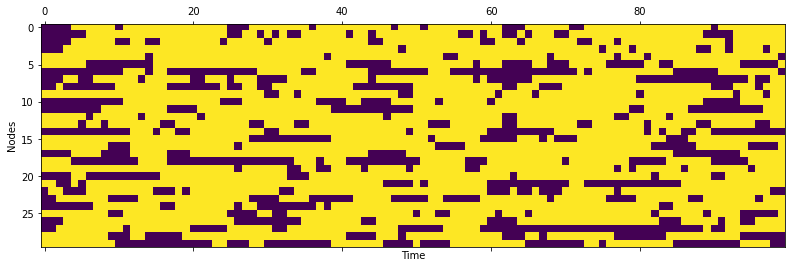

In [7]:
plt.matshow(X.T)
plt.ylabel("Nodes")
plt.xlabel('Time')

### Lotka

In [88]:
graph_generator = ErdosReyniNetworks(N=30, density=0.05, directed=True)
G = graph_generator()

In [89]:
dynamics = LotkaVolterraDynamics(intra_competition=0.3, alpha=0.8, beta=0.8)
x0 = dynamics.generate_x0(G)
T = np.arange(100)
X = dynamics.time_series(x0, G, T)

### Check the time series

Text(0.5, 0, 'Time')

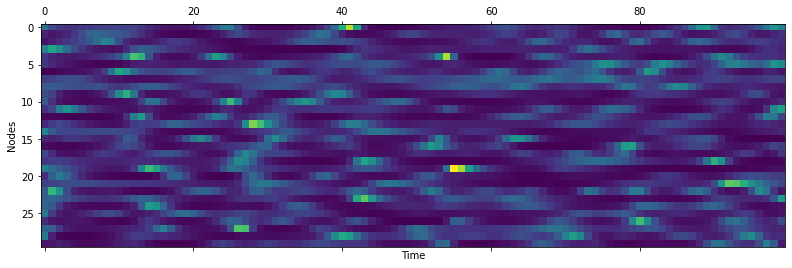

In [90]:
plt.matshow(X.T)
plt.ylabel("Nodes")
plt.xlabel('Time')

# Modifiers

A modifier takes a network and apply a perturbation.

In [46]:
modifier = RemoveRandomEdges(n_edges=10)

In [47]:
G1 = modifier.update_graph(G.copy())

In [48]:
f"Number of edges before perturbation: {len(G.edges())}"

'Number of edges before perturbation: 29'

In [49]:
f"Number of edges after perturbation: {len(G1.edges())}"

'Number of edges after perturbation: 19'

# Temporal networks

A convenient object to get a graph as a function of time.

In [57]:
t_perturb = 50

In [58]:
temporal_network = TemporalNetworks.from_modifiers(modifiers=[(t_perturb, modifier)], 
                                                   graph_generator=graph_generator)

In [59]:
f"Number of edges at t={t_perturb-1}: {len(temporal_network(t_perturb-1).edges())}"

'Number of edges at t=49: 29'

In [60]:
f"Number of edges at t={t_perturb+1}: {len(temporal_network(t_perturb+1).edges())}"

'Number of edges at t=51: 19'

# Dynamics on the temporal networks

In [61]:
dataset = Dataset(temporal_network, dynamics)

### Generate the data

In [62]:
T = np.arange(100)
Xtrain = dataset.time_series(T, burn=100)
G0 = temporal_network(0)
G1 = temporal_network(T[-1])
W0 = nx.to_numpy_array(G0)
W1 = nx.to_numpy_array(G1)

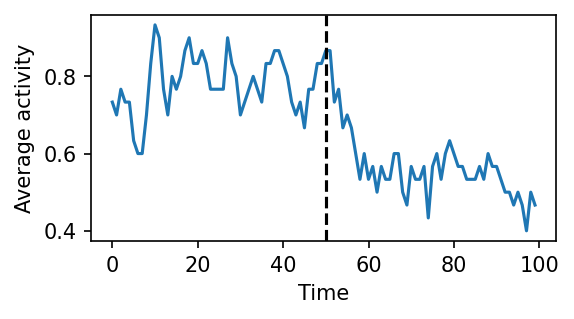

In [71]:
plt.figure(figsize=(4, 2), dpi=150)
plt.plot(T, Xtrain.mean(1))
plt.xlabel("Time"), plt.ylabel("Average activity")
plt.axvline(t_perturb, ls="--", c="k")